In [1]:
# Importation des plusieurs librairie 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

import PIL, cv2
from PIL import Image, ImageOps
from scipy.ndimage import gaussian_filter

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical
from keras.models import model_from_json

In [2]:
# Importation du dataset avec les 3 catégories différentes 
df = pd.read_csv("dataset_categories.csv")

In [3]:
df.drop(columns='Unnamed: 0',inplace=True)

In [4]:
# Creation d'une copie
data = df.copy()

In [5]:
# Verification du dataset
data[['description','image','category_general']]

,description,image,category_general
0,Key Features of Elegance Polyester Multicolor ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing
1,Specifications of Sathiyas Cotton Bath Towel (...,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care
2,Key Features of Eurospa Cotton Terry Face Towe...,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing
4,Key Features of Jaipur Print Cotton Floral Kin...,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing
...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,5912e037d12774bb73a2048f35a00009.jpg,Baby Care
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care


In [6]:
# Creation les fichiers appropriés directement sur notebook local
data['image'] = data['image'].apply(lambda x: "../Images/"+str(x))

In [7]:
data['image'] # verification

0       ../Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg
1       ../Images/7b72c92c2f6c40268628ec5f14c6d590.jpg
2       ../Images/64d5d4a258243731dc7bbb1eef49ad74.jpg
3       ../Images/d4684dcdc759dd9cdf41504698d737d8.jpg
4       ../Images/6325b6870c54cd47be6ebfbffa620ec7.jpg
                             ...                      
1045    ../Images/958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046    ../Images/fd6cbcc22efb6b761bd564c28928483c.jpg
1047    ../Images/5912e037d12774bb73a2048f35a00009.jpg
1048    ../Images/c3edc504d1b4f0ba6224fa53a43a7ad6.jpg
1049    ../Images/f2f027ad6a6df617c9f125173da71e44.jpg
Name: image, Length: 1050, dtype: object

In [8]:
from PIL import Image

In [9]:
data['image'] = data['image'].apply(lambda x:Image.open(x)) # Transformation 

C:\Users\vasub\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [10]:
data['image']

0       <PIL.JpegImagePlugin.JpegImageFile image mode=...
1       <PIL.JpegImagePlugin.JpegImageFile image mode=...
2       <PIL.JpegImagePlugin.JpegImageFile image mode=...
3       <PIL.JpegImagePlugin.JpegImageFile image mode=...
4       <PIL.JpegImagePlugin.JpegImageFile image mode=...
                              ...                        
1045    <PIL.JpegImagePlugin.JpegImageFile image mode=...
1046    <PIL.JpegImagePlugin.JpegImageFile image mode=...
1047    <PIL.JpegImagePlugin.JpegImageFile image mode=...
1048    <PIL.JpegImagePlugin.JpegImageFile image mode=...
1049    <PIL.JpegImagePlugin.JpegImageFile image mode=...
Name: image, Length: 1050, dtype: object

In [11]:
# np.array(data.iloc[0]['image']).shape 

In [12]:
# on va modifier les dimensions des images en choisissant la même largeur et hauteur
data['image'] = data['image'].apply(lambda x: x.resize([224,224])) 

In [13]:
# On va les sauvegarder comme un tableau numérique avec 3 channels
def transp_mat(col):
    return np.array(col)

data['image'] = data['image'].apply(lambda x: transp_mat(x))
np.array(data.iloc[0]['image']).shape

(224, 224, 3)

In [14]:
data['image']# verification

0       [[[203, 198, 189], [203, 198, 188], [203, 198,...
1       [[[255, 255, 255], [255, 255, 255], [255, 255,...
2       [[[255, 255, 255], [255, 255, 255], [255, 255,...
3       [[[255, 255, 255], [255, 255, 255], [255, 255,...
4       [[[82, 77, 71], [123, 114, 111], [155, 147, 14...
                              ...                        
1045    [[[254, 254, 252], [255, 255, 254], [255, 255,...
1046    [[[253, 216, 224], [253, 216, 224], [253, 216,...
1047    [[[255, 255, 255], [255, 255, 255], [255, 255,...
1048    [[[53, 53, 55], [54, 54, 56], [53, 53, 55], [5...
1049    [[[239, 222, 230], [239, 222, 230], [239, 222,...
Name: image, Length: 1050, dtype: object

In [15]:
# Transformation int -> float32
for i in range(data.shape[0]):
  data.iloc[i]['image'] = data.iloc[i]['image'].astype('float32')
  

C:\Users\vasub\anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [16]:
# Normalisation
data['image'] = data['image'].apply(lambda x: x/255)

In [17]:
data['image'] # verification

0       [[[0.796078431372549, 0.7764705882352941, 0.74...
1       [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
2       [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
3       [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
4       [[[0.3215686274509804, 0.30196078431372547, 0....
                              ...                        
1045    [[[0.996078431372549, 0.996078431372549, 0.988...
1046    [[[0.9921568627450981, 0.8470588235294118, 0.8...
1047    [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
1048    [[[0.20784313725490197, 0.20784313725490197, 0...
1049    [[[0.9372549019607843, 0.8705882352941177, 0.9...
Name: image, Length: 1050, dtype: object

# Préparation d'entrenement

In [18]:
X = np.array([x for x in data['image']])

In [19]:
X.shape # (pour entrainer nous avons besoin (batch,width, height,channel))

(1050, 224, 224, 3)

In [20]:
y=data['category_general'] # target

In [21]:
# Transformation text en chiffre 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [22]:
y

array([4, 0, 0, ..., 0, 0, 0])

In [23]:
# séparation en 2 parties (entrainement et test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
# OHE
y_train_cat = keras.utils.to_categorical(y_train,7)
y_test_cat = keras.utils.to_categorical(y_test,7)

# TRANSFER LEARNING (Model VGG16 )

In [25]:
json_file = open("projet_6_vgg_model.json", "r")
loaded_model_json  = json_file.read()
json_file.close()

In [26]:
loaded_vgg_model = model_from_json(loaded_model_json)

In [27]:
# Importation the weights
loaded_vgg_model.load_weights("model_weights_vgg_model.h5")

In [28]:
loaded_vgg_model.compile(optimizer = keras.optimizers.Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\vasub\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [29]:
loaded_vgg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

#### Tester sur des données de test

In [30]:
scores = loaded_vgg_model.evaluate(X_test, y_test_cat)
print("Accuracy: %.2f%%" % (scores[1]*100))

11/11 [==============================] - 169s 16s/step - loss: 0.6882 - accuracy: 0.7637
Accuracy: 76.37%


# Prediction

In [31]:
n = 161 # Choisissez le numéro de 0 à 1049
X_new = np.expand_dims(X[n],axis=0)

Text(0.5, 1.0, 'Kitchen & Dining')

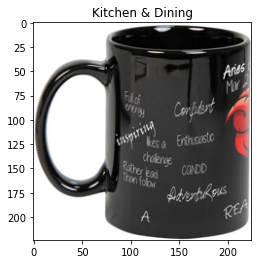

In [32]:
pred = loaded_vgg_model.predict(X_new)
plt.imshow(X[n])
plt.title(le.classes_[np.argmax(pred)])

# VGG16

In [33]:
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input
from tensorflow.python.keras.preprocessing import image


In [34]:
model_vgg = tf.keras.applications.vgg16.VGG16()

In [35]:
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [36]:
data_new = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

In [37]:
data_new['image'] = data_new['image'].apply(lambda x: "../Images/"+str(x))

In [38]:
num_orig_vgg= 161  # Un numero de 0 à 1049


In [39]:
img = image.load_img(data_new.loc[num_orig_vgg,'image'], target_size=(224,224))
x= image.img_to_array(img)
x =np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [40]:
preds = model_vgg.predict(x)
print(decode_predictions(preds, top=3)[0])

[('n03063599', 'coffee_mug', 0.9393815), ('n07930864', 'cup', 0.047350686), ('n03733805', 'measuring_cup', 0.008499231)]


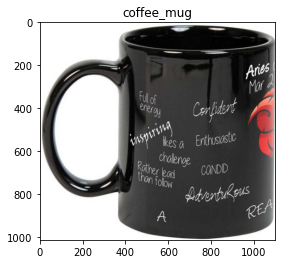

In [41]:
plt.imshow(Image.open(data_new.loc[num_orig_vgg,'image']))
plt.title(decode_predictions(preds, top=1)[0][0][1]);

In [42]:
decode_predictions(preds, top=1)[0][0][1]

'coffee_mug'